### Deliverable 3: Optimise the Model

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')


#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"],1)
application_df

/Users/jay.kansara2019/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

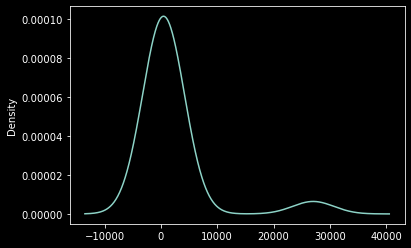

In [6]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [7]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

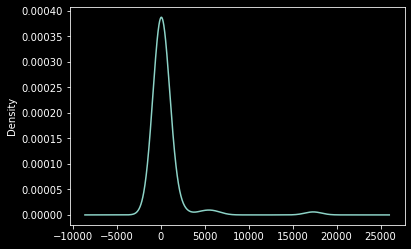

In [9]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [10]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [11]:
# Generate our categorical variable lists
application_cat = ["APPLICATION_TYPE", "AFFILIATION", "CLASSIFICATION", "USE_CASE", "ORGANIZATION", "INCOME_AMT", 
                  "SPECIAL_CONSIDERATIONS"]

In [12]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True).drop(columns=application_cat, axis=1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL
X = application_df.drop("IS_SUCCESSFUL", axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Change in activation method

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


2022-05-15 18:02:18.696940: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints2/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [19]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])


Epoch 1/100
789/804 [============================>.] - ETA: 0s - loss: 0.5731 - accuracy: 0.7171
Epoch 1: saving model to checkpoints/weights.01.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5721 - accuracy: 0.7177
Epoch 2/100
778/804 [============================>.] - ETA: 0s - loss: 0.5585 - accuracy: 0.7261
Epoch 2: saving model to checkpoints/weights.02.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5588 - accuracy: 0.7264
Epoch 3/100
803/804 [============================>.] - ETA: 0s - loss: 0.5562 - accuracy: 0.7259
Epoch 3: saving model to checkpoints/weights.03.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5563 - accuracy: 0.7258
Epoch 4/100
798/804 [============================>.] - ETA: 0s - loss: 0.5540 - accuracy: 0.7280
Epoch 4: saving model to checkpoints/weights.04.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5541 - accuracy: 0.7281
Epoch 5/100
790/804 [=======================

804/804 [==============================] - ETA: 0s - loss: 0.5425 - accuracy: 0.7348
Epoch 35: saving model to checkpoints/weights.35.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5425 - accuracy: 0.7348
Epoch 36/100
804/804 [==============================] - ETA: 0s - loss: 0.5421 - accuracy: 0.7341
Epoch 36: saving model to checkpoints/weights.36.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5421 - accuracy: 0.7341
Epoch 37/100
797/804 [============================>.] - ETA: 0s - loss: 0.5426 - accuracy: 0.7347
Epoch 37: saving model to checkpoints/weights.37.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5423 - accuracy: 0.7349
Epoch 38/100
785/804 [============================>.] - ETA: 0s - loss: 0.5421 - accuracy: 0.7342
Epoch 38: saving model to checkpoints/weights.38.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5417 - accuracy: 0.7348
Epoch 39/100
782/804 [===========================

781/804 [============================>.] - ETA: 0s - loss: 0.5388 - accuracy: 0.7372
Epoch 69: saving model to checkpoints/weights.69.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5390 - accuracy: 0.7367
Epoch 70/100
782/804 [============================>.] - ETA: 0s - loss: 0.5391 - accuracy: 0.7358
Epoch 70: saving model to checkpoints/weights.70.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5387 - accuracy: 0.7361
Epoch 71/100
801/804 [============================>.] - ETA: 0s - loss: 0.5391 - accuracy: 0.7360
Epoch 71: saving model to checkpoints/weights.71.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5390 - accuracy: 0.7362
Epoch 72/100
795/804 [============================>.] - ETA: 0s - loss: 0.5386 - accuracy: 0.7369
Epoch 72: saving model to checkpoints/weights.72.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5388 - accuracy: 0.7368
Epoch 73/100
783/804 [===========================

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5439 - accuracy: 0.7396 - 516ms/epoch - 2ms/step
Loss: 0.543918788433075, Accuracy: 0.7395918369293213


## Addition of another hidden layer

In [21]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3520      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 10)                310       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 6,271
Trainable params: 6,271
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints3/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [24]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
778/804 [============================>.] - ETA: 0s - loss: 0.5721 - accuracy: 0.7183
Epoch 1: saving model to checkpoints/weights.01.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5719 - accuracy: 0.7186
Epoch 2/100
777/804 [===========================>..] - ETA: 0s - loss: 0.5583 - accuracy: 0.7255
Epoch 2: saving model to checkpoints/weights.02.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5581 - accuracy: 0.7257
Epoch 3/100
777/804 [===========================>..] - ETA: 0s - loss: 0.5550 - accuracy: 0.7256
Epoch 3: saving model to checkpoints/weights.03.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5552 - accuracy: 0.7259
Epoch 4/100
797/804 [============================>.] - ETA: 0s - loss: 0.5534 - accuracy: 0.7264
Epoch 4: saving model to checkpoints/weights.04.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5537 - accuracy: 0.7260
Epoch 5/100
790/804 [=======================

790/804 [============================>.] - ETA: 0s - loss: 0.5421 - accuracy: 0.7335
Epoch 35: saving model to checkpoints/weights.35.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5415 - accuracy: 0.7340
Epoch 36/100
794/804 [============================>.] - ETA: 0s - loss: 0.5415 - accuracy: 0.7344
Epoch 36: saving model to checkpoints/weights.36.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5411 - accuracy: 0.7345
Epoch 37/100
799/804 [============================>.] - ETA: 0s - loss: 0.5409 - accuracy: 0.7344
Epoch 37: saving model to checkpoints/weights.37.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5406 - accuracy: 0.7346
Epoch 38/100
795/804 [============================>.] - ETA: 0s - loss: 0.5409 - accuracy: 0.7341
Epoch 38: saving model to checkpoints/weights.38.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5408 - accuracy: 0.7341
Epoch 39/100
785/804 [===========================

778/804 [============================>.] - ETA: 0s - loss: 0.5384 - accuracy: 0.7366
Epoch 69: saving model to checkpoints/weights.69.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5380 - accuracy: 0.7369
Epoch 70/100
789/804 [============================>.] - ETA: 0s - loss: 0.5380 - accuracy: 0.7366
Epoch 70: saving model to checkpoints/weights.70.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5381 - accuracy: 0.7364
Epoch 71/100
787/804 [============================>.] - ETA: 0s - loss: 0.5374 - accuracy: 0.7369
Epoch 71: saving model to checkpoints/weights.71.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5380 - accuracy: 0.7368
Epoch 72/100
776/804 [===========================>..] - ETA: 0s - loss: 0.5383 - accuracy: 0.7365
Epoch 72: saving model to checkpoints/weights.72.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5375 - accuracy: 0.7366
Epoch 73/100
784/804 [===========================

In [25]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5498 - accuracy: 0.7384 - 302ms/epoch - 1ms/step
Loss: 0.5497636198997498, Accuracy: 0.7384256720542908


### Adjusting epochs, number of hidden layer and activation method

In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 8
hidden_nodes_layer3 = 8

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                440       
                                                                 
 dense_8 (Dense)             (None, 8)                 88        
                                                                 
 dense_9 (Dense)             (None, 8)                 72        
                                                                 
 dense_10 (Dense)            (None, 1)                 9         
                                                                 
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints4/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [29]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=150,callbacks=[cp_callback])

Epoch 1/150
795/804 [============================>.] - ETA: 0s - loss: 0.5944 - accuracy: 0.7020
Epoch 1: saving model to checkpoints/weights.01.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5940 - accuracy: 0.7022
Epoch 2/150
781/804 [============================>.] - ETA: 0s - loss: 0.5631 - accuracy: 0.7242
Epoch 2: saving model to checkpoints/weights.02.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5634 - accuracy: 0.7241
Epoch 3/150
787/804 [============================>.] - ETA: 0s - loss: 0.5599 - accuracy: 0.7245
Epoch 3: saving model to checkpoints/weights.03.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5601 - accuracy: 0.7245
Epoch 4/150
790/804 [============================>.] - ETA: 0s - loss: 0.5572 - accuracy: 0.7262
Epoch 4: saving model to checkpoints/weights.04.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5578 - accuracy: 0.7255
Epoch 5/150
786/804 [=======================

795/804 [============================>.] - ETA: 0s - loss: 0.5490 - accuracy: 0.7298
Epoch 35: saving model to checkpoints/weights.35.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5492 - accuracy: 0.7297
Epoch 36/150
789/804 [============================>.] - ETA: 0s - loss: 0.5490 - accuracy: 0.7315
Epoch 36: saving model to checkpoints/weights.36.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5488 - accuracy: 0.7314
Epoch 37/150
792/804 [============================>.] - ETA: 0s - loss: 0.5488 - accuracy: 0.7302
Epoch 37: saving model to checkpoints/weights.37.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5488 - accuracy: 0.7300
Epoch 38/150
796/804 [============================>.] - ETA: 0s - loss: 0.5486 - accuracy: 0.7309
Epoch 38: saving model to checkpoints/weights.38.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5486 - accuracy: 0.7306
Epoch 39/150
801/804 [===========================

800/804 [============================>.] - ETA: 0s - loss: 0.5465 - accuracy: 0.7321
Epoch 69: saving model to checkpoints/weights.69.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5467 - accuracy: 0.7319
Epoch 70/150
786/804 [============================>.] - ETA: 0s - loss: 0.5457 - accuracy: 0.7332
Epoch 70: saving model to checkpoints/weights.70.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5464 - accuracy: 0.7327
Epoch 71/150
786/804 [============================>.] - ETA: 0s - loss: 0.5465 - accuracy: 0.7316
Epoch 71: saving model to checkpoints/weights.71.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5465 - accuracy: 0.7319
Epoch 72/150
792/804 [============================>.] - ETA: 0s - loss: 0.5463 - accuracy: 0.7323
Epoch 72: saving model to checkpoints/weights.72.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5463 - accuracy: 0.7323
Epoch 73/150
798/804 [===========================

800/804 [============================>.] - ETA: 0s - loss: 0.5454 - accuracy: 0.7320
Epoch 103: saving model to checkpoints/weights.103.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5451 - accuracy: 0.7322
Epoch 104/150
779/804 [============================>.] - ETA: 0s - loss: 0.5451 - accuracy: 0.7333
Epoch 104: saving model to checkpoints/weights.104.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5448 - accuracy: 0.7334
Epoch 105/150
795/804 [============================>.] - ETA: 0s - loss: 0.5454 - accuracy: 0.7331
Epoch 105: saving model to checkpoints/weights.105.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5452 - accuracy: 0.7332
Epoch 106/150
802/804 [============================>.] - ETA: 0s - loss: 0.5453 - accuracy: 0.7330
Epoch 106: saving model to checkpoints/weights.106.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5453 - accuracy: 0.7330
Epoch 107/150
803/804 [===============

804/804 [==============================] - 2s 2ms/step - loss: 0.5448 - accuracy: 0.7320
Epoch 137/150
792/804 [============================>.] - ETA: 0s - loss: 0.5443 - accuracy: 0.7335
Epoch 137: saving model to checkpoints/weights.137.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5446 - accuracy: 0.7331
Epoch 138/150
800/804 [============================>.] - ETA: 0s - loss: 0.5449 - accuracy: 0.7321
Epoch 138: saving model to checkpoints/weights.138.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5450 - accuracy: 0.7321
Epoch 139/150
786/804 [============================>.] - ETA: 0s - loss: 0.5448 - accuracy: 0.7326
Epoch 139: saving model to checkpoints/weights.139.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5447 - accuracy: 0.7327
Epoch 140/150
799/804 [============================>.] - ETA: 0s - loss: 0.5451 - accuracy: 0.7325
Epoch 140: saving model to checkpoints/weights.140.hdf5
804/804 [===============

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5445 - accuracy: 0.7403 - 326ms/epoch - 1ms/step
Loss: 0.5444718599319458, Accuracy: 0.7402915358543396


In [31]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")